# Goal for Part 1: predicting solubility

In [8]:
import pandas as pd

In [11]:
data = pd.read_csv('../../Data/Solubility/dataset-E.csv')

In [12]:
data

,ID,Name,InChI,InChIKey,SMILES,Solubility
0,E-1,n-pentane,"InChI=1S/C5H12/c1-3-5-4-2/h3-5H2,1-2H3",OFBQJSOFQDEBGM-UHFFFAOYSA-N,CCCCC,-3.18
1,E-2,cyclopentane,InChI=1S/C5H10/c1-2-4-5-3-1/h1-5H2,RGSFGYAAUTVSQA-UHFFFAOYSA-N,C1CCCC1,-2.64
2,E-3,n-hexane,"InChI=1S/C6H14/c1-3-5-6-4-2/h3-6H2,1-2H3",VLKZOEOYAKHREP-UHFFFAOYSA-N,CCCCCC,-3.84
3,E-4,2-methylpentane,"InChI=1S/C6H14/c1-4-5-6(2)3/h6H,4-5H2,1-3H3",AFABGHUZZDYHJO-UHFFFAOYSA-N,CCCC(C)C,-3.74
4,E-5,"2,2-dimethylbutane","InChI=1S/C6H14/c1-5-6(2,3)4/h5H2,1-4H3",HNRMPXKDFBEGFZ-UHFFFAOYSA-N,CCC(C)(C)C,-3.55
...,...,...,...,...,...,...
1286,E-1287,malathion,InChI=1S/C10H19O6PS2/c1-5-15-9(11)7-8(10(12)16...,JXSJBGJIGXNWCI-UHFFFAOYSA-N,CCOC(=O)CC(SP(=S)(OC)OC)C(=O)OCC,-3.37
1287,E-1288,chlorpyriphos,"InChI=1S/C9H11Cl3NO3PS/c1-3-14-17(18,15-4-2)16...",SBPBAQFWLVIOKP-UHFFFAOYSA-N,CCOP(=S)(OCC)Oc1nc(Cl)c(Cl)cc1Cl,-5.49
1288,E-1289,prostaglandin_E2,InChI=1S/C20H32O5/c1-2-3-6-9-15(21)12-13-17-16...,XEYBRNLFEZDVAW-UHFFFAOYSA-N,CCCCCC(O)C=CC1C(O)CC(=O)C1CC=CCCCC(=O)O,-2.47
1289,E-1290,"p,p'-DDT",InChI=1S/C14H9Cl5/c15-11-5-1-9(2-6-11)13(14(17...,YVGGHNCTFXOJCH-UHFFFAOYSA-N,c(ccc(c1)Cl)(c1)C(c(ccc(c2)Cl)c2)C(Cl)(Cl)Cl,-7.15


# Representation, SMILES, feature engineering

In [26]:
data = data[['SMILES','Solubility']]

In [27]:
data

,SMILES,Solubility
0,CCCCC,-3.18
1,C1CCCC1,-2.64
2,CCCCCC,-3.84
3,CCCC(C)C,-3.74
4,CCC(C)(C)C,-3.55
...,...,...
1286,CCOC(=O)CC(SP(=S)(OC)OC)C(=O)OCC,-3.37
1287,CCOP(=S)(OCC)Oc1nc(Cl)c(Cl)cc1Cl,-5.49
1288,CCCCCC(O)C=CC1C(O)CC(=O)C1CC=CCCCC(=O)O,-2.47
1289,c(ccc(c1)Cl)(c1)C(c(ccc(c2)Cl)c2)C(Cl)(Cl)Cl,-7.15


In [14]:
from rdkit import Chem

In [15]:
n_pentane = Chem.MolFromSmiles(data['SMILES'][0])

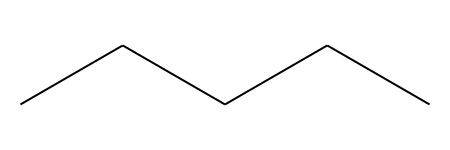

In [16]:
n_pentane

In [17]:
n_pentane = Chem.AddHs(n_pentane)

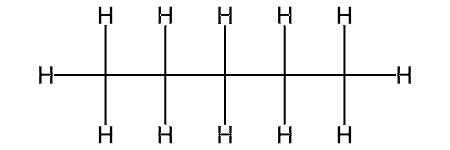

In [18]:
n_pentane

In [19]:
from mordred import Calculator, descriptors

In [20]:
featurizer = Calculator() 

http://mordred-descriptor.github.io/documentation/v1.1.1/descriptors.html

In [21]:
from mordred.AtomCount import *

In [22]:
from mordred.Aromatic import *

In [23]:
from mordred.TopologicalIndex import *

In [24]:
featurizer.register([AtomCount("C"),AtomCount("H"),AromaticBondsCount(),Diameter()])

In [25]:
featurizer(n_pentane)

Result(<rdkit.Chem.rdchem.Mol object at 0x7f2f1acd2e40>,[5, 12, 0, 4],[mordred.AtomCount.AtomCount('C'), mordred.AtomCount.AtomCount('H'), mordred.Aromatic.AromaticBondsCount(), mordred.TopologicalIndex.Diameter()])

In [17]:
def create_molecule(smiles):
    return Chem.MolFromSmiles(smiles)

In [18]:
data_rdkit = data['SMILES'].apply(create_molecule)

In [19]:
data_rdkit

0       <rdkit.Chem.rdchem.Mol object at 0x1325530a0>
1       <rdkit.Chem.rdchem.Mol object at 0x132553100>
2       <rdkit.Chem.rdchem.Mol object at 0x132553160>
3       <rdkit.Chem.rdchem.Mol object at 0x1325531c0>
4       <rdkit.Chem.rdchem.Mol object at 0x132553220>
                            ...                      
1286    <rdkit.Chem.rdchem.Mol object at 0x1325728e0>
1287    <rdkit.Chem.rdchem.Mol object at 0x132572940>
1288    <rdkit.Chem.rdchem.Mol object at 0x1325729a0>
1289    <rdkit.Chem.rdchem.Mol object at 0x132572a00>
1290    <rdkit.Chem.rdchem.Mol object at 0x132572a60>
Name: SMILES, Length: 1291, dtype: object

In [20]:
dataf = featurizer.pandas(data_rdkit)

100%|██████████| 1291/1291 [00:01<00:00, 1131.78it/s]


In [21]:
dataf

,nC,nH,nAromBond,Diameter
0,5,12,0,4
1,5,10,0,2
2,6,14,0,5
3,6,14,0,4
4,6,14,0,3
...,...,...,...,...
1286,10,19,0,9
1287,9,11,6,9
1288,20,32,0,17
1289,14,9,12,10


# Choosing features, correlation

In [22]:
dataf.corrwith(data['Solubility'])

nC          -0.591717
nH          -0.205642
nAromBond   -0.505360
Diameter    -0.038753
dtype: float64

In [23]:
import matplotlib.pyplot as plt

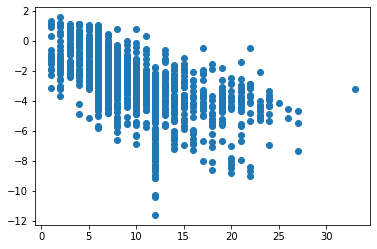

In [24]:
plt.scatter(dataf['nC'],data['Solubility'])

In [25]:
import seaborn as sns

<AxesSubplot:>

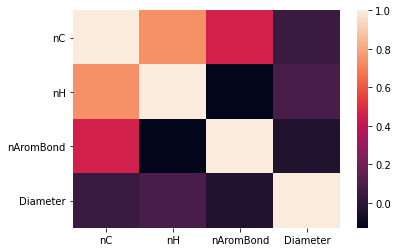

In [26]:
sns.heatmap(dataf.corr())